## Activity 5: Metrics

**Team's name:** *AI's Daemons*\
**Team's members:**
- Cristobal Eleazar Meza (A01661792)
- Ricardo Campos Luna (A01656898)
- Diego Esteban Zepeda Ceballos (A01026512)

The Wine dataset is a classic dataset used frequently in the realm of pattern recognition and machine learning. This dataset originates from the UCI Machine Learning Repository and is often utilized for classification tasks.

Features:

The Wine dataset comprises 13 different measurements taken for three types of wine cultivated in the same region in Italy. These measurements (or features) can be broadly categorized into:

* Alcohol content
* Malic acid
* Ash
* Alkalinity of ash
* Magnesium
* Total phenols
* Flavonoids
* Non-flavonoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

The primary goal when working with the Wine dataset is to predict the type of wine based on the given features. There are three classes of wines in the dataset, and each class corresponds to a type of wine cultivated in a specific area of Italy.

### Import libraries
Hint: Consider importing the pandas, sklearn, seaborn, and matplotlib libraries.

In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Define functions to plot the confusion matrix and train/evaluate the models.

In [2]:
from sklearn.metrics import confusion_matrix as cm

### Load the Wine dataset in a pandas dataframe and show the first 10 values

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=";")
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


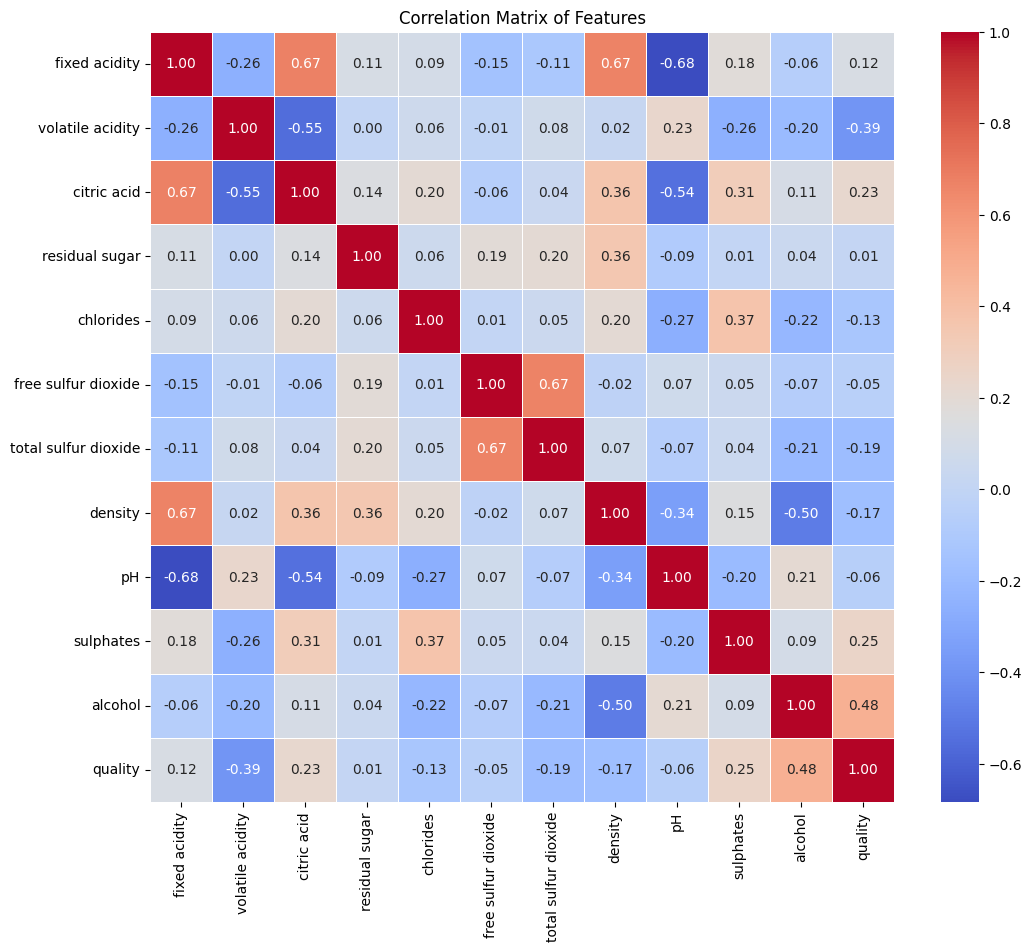

In [4]:
# Compute the correlation matrix
corr_matrix = wine_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

### Split the dataset. Use 25% as test data and 75% as training data.


In [12]:
# Features definition and target
columns_to_drop = ['quality', 'fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                   'total sulfur dioxide', 'density', 'pH', 'sulphates','volatile acidity']
dropped_features = wine_data[columns_to_drop]
#X = wine_data.drop(columns_to_drop, axis=1)  # Features (all columns except 'quality' since its our label or target)

X = wine_data.drop('quality', axis = 1)  # Features (all columns except 'quality' since its our label or target)
y = wine_data['quality']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [6]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1199, 11)
Testing data shape: (400, 11)


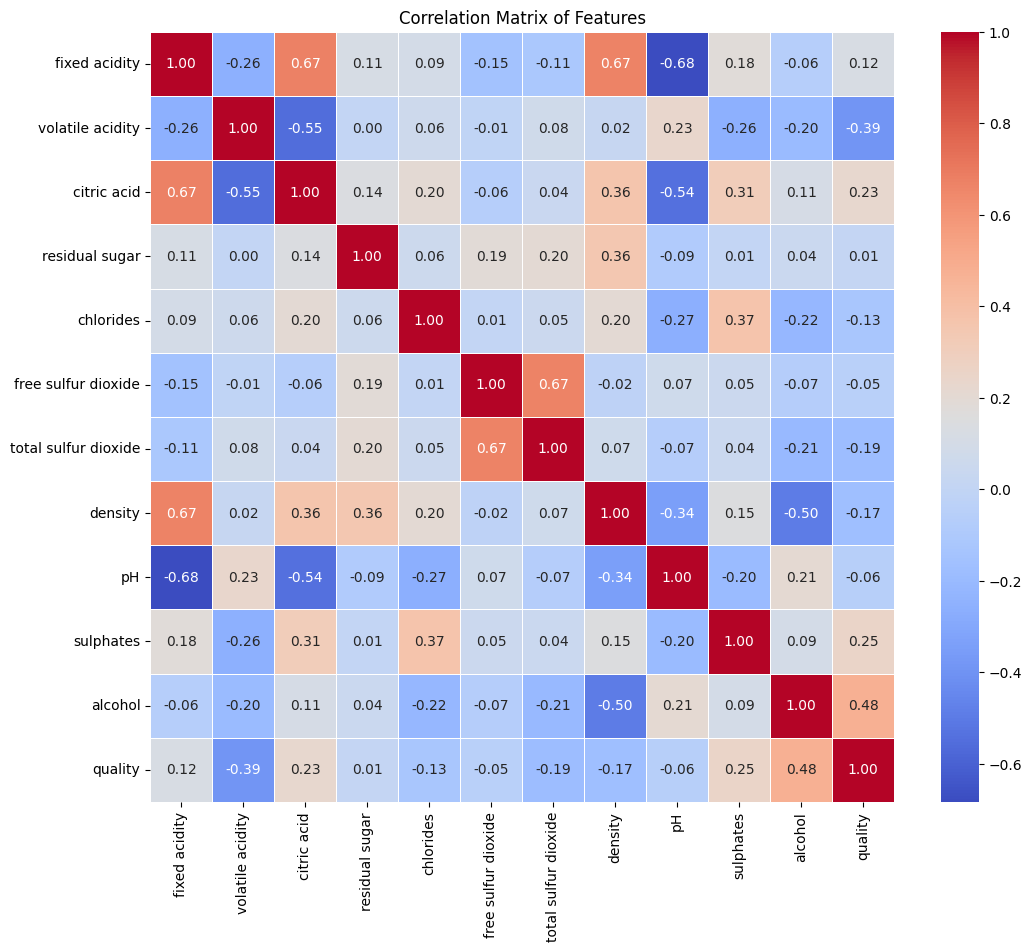

In [7]:
# Compute the correlation matrix
corr_matrix = X.corr()
X_with_dropped_features = pd.concat([X, dropped_features[['quality']]], axis=1)
corr_with_dropped = X_with_dropped_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_with_dropped, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data, and transform the test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


### Create a dictionary with the ML models.
Use at least 4 different classification algorithms.


In [14]:
# one
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)

# two
from sklearn.svm import SVC
svm_model = SVC(random_state = 42)

# three
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

# four
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

# models
models = {
    "Random Forest": rf_model,
    "SVM": svm_model,
    "k-NN": knn_model,
    "Naive Bayes": nb_model
}

### Train the models and show the metrics (accuracy, precision, recall, and F1-score) and the confusion matrix for each one.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14


Random Forest Metrics:
Accuracy: 0.6700
Precision: 0.6403
Recall: 0.6700
F1 Score: 0.6531

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.74      0.75      0.75       164
           6       0.63      0.72      0.67       169
           7       0.59      0.48      0.53        48
           8       0.00      0.00      0.00         5

    accuracy                           0.67       400
   macro avg       0.33      0.33      0.32       400
weighted avg       0.64      0.67      0.65       400



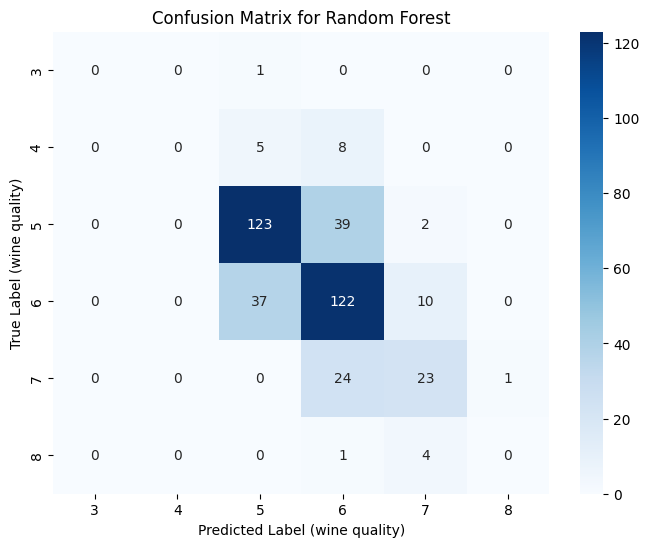

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14


SVM Metrics:
Accuracy: 0.5100
Precision: 0.5588
Recall: 0.5100
F1 Score: 0.4657

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.59      0.51      0.55       164
           6       0.46      0.71      0.56       169
           7       1.00      0.02      0.04        48
           8       0.00      0.00      0.00         5

    accuracy                           0.51       400
   macro avg       0.34      0.21      0.19       400
weighted avg       0.56      0.51      0.47       400



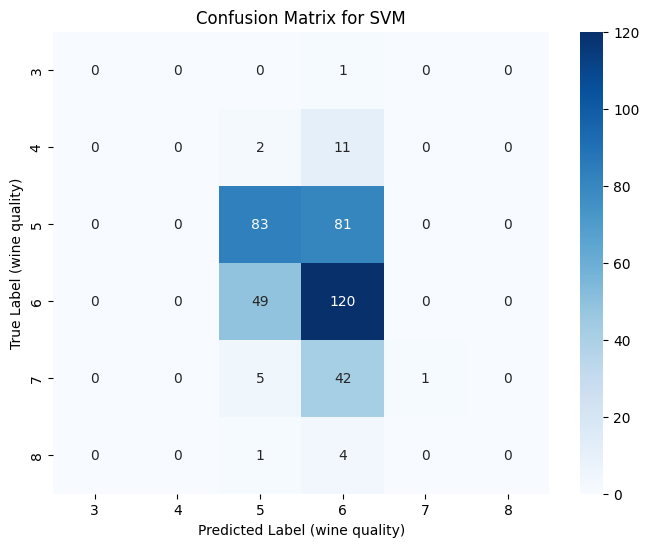

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14


k-NN Metrics:
Accuracy: 0.4675
Precision: 0.4355
Recall: 0.4675
F1 Score: 0.4441

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.49      0.64      0.56       164
           6       0.47      0.44      0.45       169
           7       0.30      0.15      0.20        48
           8       0.00      0.00      0.00         5

    accuracy                           0.47       400
   macro avg       0.21      0.20      0.20       400
weighted avg       0.44      0.47      0.44       400



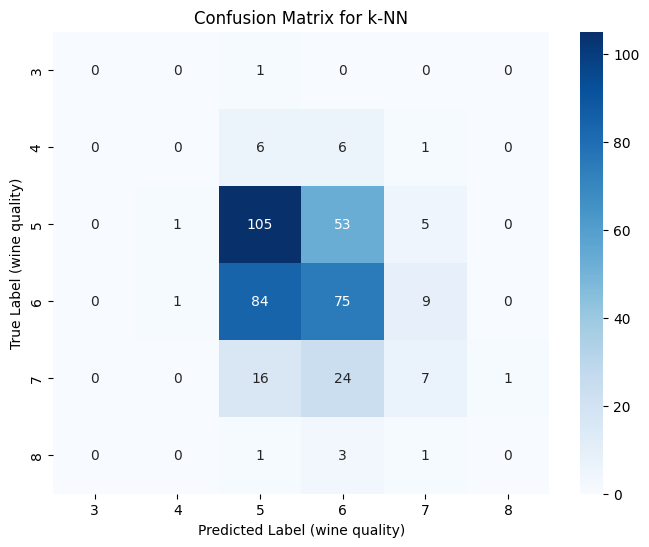


Naive Bayes Metrics:
Accuracy: 0.5525
Precision: 0.5574
Recall: 0.5525
F1 Score: 0.5532

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.15      0.17        13
           5       0.68      0.62      0.65       164
           6       0.53      0.55      0.54       169
           7       0.38      0.50      0.43        48
           8       0.00      0.00      0.00         5

    accuracy                           0.55       400
   macro avg       0.30      0.30      0.30       400
weighted avg       0.56      0.55      0.55       400



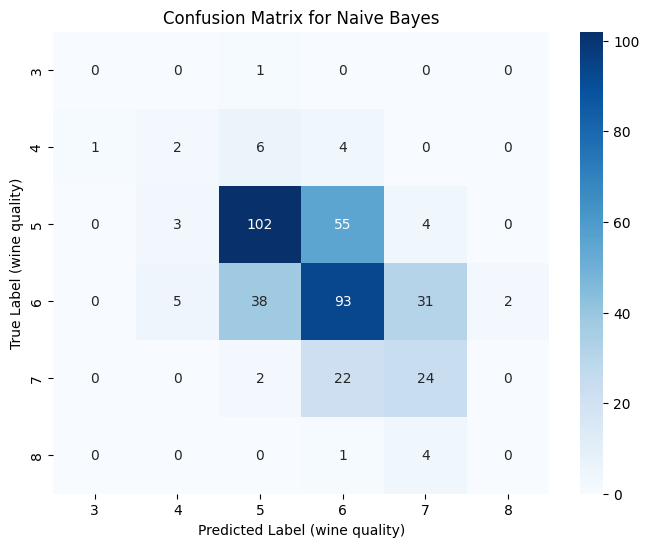

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

for name, model in models.items():
    # Train the models one by one
    model.fit(X_train, y_train)

    # Make predictions one by one
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Show metrics
    print(f"\n{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label (wine quality)')
    plt.ylabel('True Label (wine quality)')
    plt.show()

### According to the results, which model do you select and why? Put your response in the following cell. (10 points)

It depends if we want to focus on identifying a specific range of wine quality for this we should consider the bias of each model (for example if wine quality overestimations are more important than underestimations or vice-versa). The given wine dataset is not balanced, and therefore all proposed models are a little skewed (to values 5 and 6).

We would choose **random forest** model because this is the model that has the highest **accuracy** and **F1_score** compared with others that we evaluated.

